## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on = ['Mouse ID', 'Mouse ID'])
# Display the data table for preview
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# len(mouse_metadata['Mouse ID'].unique())
len(study_results['Mouse ID'].unique())

249

In [4]:
# pd.__version__
# mouse_study_df.value_counts(['Mouse ID', 'Timepoint'])

In [5]:
# Checking the number of mice.
mouse_study_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_df.drop_duplicates(['Mouse ID', 'Timepoint'])
mouse_study_df.loc[mouse_study_df.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_df.loc[mouse_study_df.duplicated(['Mouse ID', 'Timepoint']), :]
duplicate_data
mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989', :]
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
by_regimen_df = mouse_study_df.groupby('Drug Regimen')
summary_stats_df = pd.DataFrame({'mean': by_regimen_df['Tumor Volume (mm3)'].mean()
                                  , 'median': by_regimen_df['Tumor Volume (mm3)'].median()
                                  , 'variance': by_regimen_df['Tumor Volume (mm3)'].var()
                                  , 'std': by_regimen_df['Tumor Volume (mm3)'].std()
                                  , 'sem': by_regimen_df['Tumor Volume (mm3)'].sem()})
summary_stats_df

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df_2 = by_regimen_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

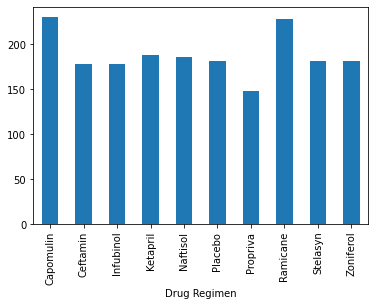

In [12]:
mouse_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind = 'bar')

## Bar and Pie Charts

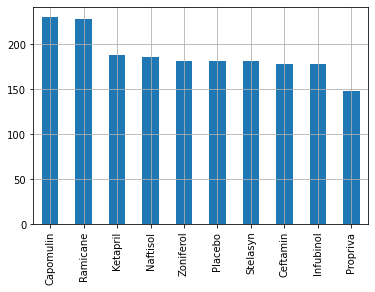

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_study_df['Drug Regimen'].value_counts().plot(kind = 'bar')
plt.grid()

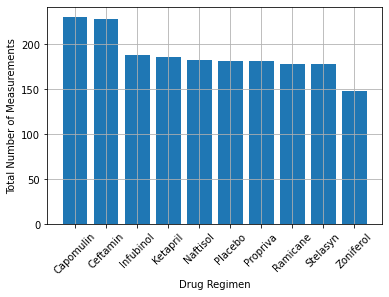

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(by_regimen_df['Drug Regimen'].count().index, mouse_study_df['Drug Regimen'].value_counts())
plt.xticks(rotation = 45)
plt.title('')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements')
plt.grid()


Male      958
Female    922
Name: Sex, dtype: int64

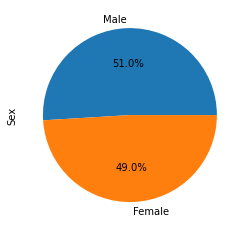

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_study_df['Sex'].value_counts()
mouse_sex.plot(kind = 'pie', autopct = '%.1f%%')
mouse_study_df['Sex'].value_counts()

Text(0.5, 1.0, 'Mouse sex')

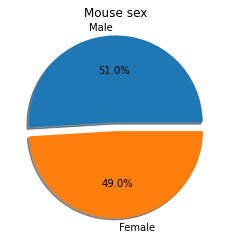

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0)
plt.pie(mouse_sex, labels = mouse_sex.index, autopct = '%.1f%%', explode = explode, shadow = True)
plt.title('Mouse sex')

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
by_mouseid_df = mouse_study_df.groupby('Mouse ID')
mouse_max_timepoint_df = by_mouseid_df['Timepoint'].max().to_frame()
mouse_max_timepoint_df.reset_index(inplace = True)
mouse_max_timepoint_df
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_max_timepoint_df = pd.merge(mouse_study_df, mouse_max_timepoint_df)
mouse_max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatements = mouse_max_timepoint_df['Drug Regimen'].unique()
list(treatements)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
by_drug_regimen = mouse_max_timepoint_df.groupby('Drug Regimen')
quantiles = by_drug_regimen['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
type(quantiles)
IQRs = {}
for drug in list(quantiles.index.get_level_values(0)):
    IQR = quantiles[drug][0.75] - quantiles[drug][0.25]
    upper = quantiles[drug][0.75] + 1.5 * IQR
    lower = quantiles[drug][0.25] - 1.5 * IQR
    IQRs[drug] = {'IQR': IQR, 'upper': upper, 'lower': lower}
IQRs

{'Capomulin': {'IQR': 7.781863460000004,
  'upper': 51.83201549,
  'lower': 20.70456164999999},
 'Ceftamin': {'IQR': 15.577752179999997,
  'upper': 87.66645829999999,
  'lower': 25.355449580000002},
 'Infubinol': {'IQR': 11.477135160000003,
  'upper': 82.74144559000001,
  'lower': 36.83290494999999},
 'Ketapril': {'IQR': 13.152155339999993,
  'upper': 89.60048379999998,
  'lower': 36.99186244000001},
 'Naftisol': {'IQR': 17.484110670000007,
  'upper': 95.78978676500002,
  'lower': 25.85334408499999},
 'Placebo': {'IQR': 15.191386480000006,
  'upper': 90.92136789000001,
  'lower': 30.15582196999999},
 'Propriva': {'IQR': 13.569628922499994,
  'upper': 83.04381145624998,
  'lower': 28.76529576625001},
 'Ramicane': {'IQR': 9.098536719999998,
  'upper': 54.30681135,
  'lower': 17.912664470000003},
 'Stelasyn': {'IQR': 16.62734878500001,
  'upper': 94.04496758000002,
  'lower': 27.53557243999998},
 'Zoniferol': {'IQR': 16.805853529999993,
  'upper': 92.00293628499998,
  'lower': 24.77952216

In [19]:
r = mouse_max_timepoint_df.loc[mouse_max_timepoint_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
q = r.quantile([0.25, 0.5, 0.75])
i = q[0.75] - q[0.25]
u = q[0.75] + 1.5*i
u

54.30681135

In [20]:

    # Locate the rows which contain mice on each drug and get the tumor volumes
mouse_max_timepoint_df['IQR'] =  [IQRs[x]['IQR'] for x in mouse_max_timepoint_df['Drug Regimen']]
mouse_max_timepoint_df['upper'] = [IQRs[x]['upper'] for x in mouse_max_timepoint_df['Drug Regimen']]
mouse_max_timepoint_df['lower'] = [IQRs[x]['lower'] for x in mouse_max_timepoint_df['Drug Regimen']]
mouse_max_timepoint_df['is_outlier'] = (mouse_max_timepoint_df['Tumor Volume (mm3)'] > mouse_max_timepoint_df['upper']) | (mouse_max_timepoint_df['Tumor Volume (mm3)'] < mouse_max_timepoint_df['lower'])


    # add subset 
    
    
    # Determine outliers using upper and lower bounds
mouse_max_timepoint_df.loc[mouse_max_timepoint_df['is_outlier'], :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,IQR,upper,lower,is_outlier
74,c326,Infubinol,Female,18,25,5,36.321346,0,11.477135,82.741446,36.832905,True


Text(0, 0.5, 'Final Tumor Volume (mm3)')

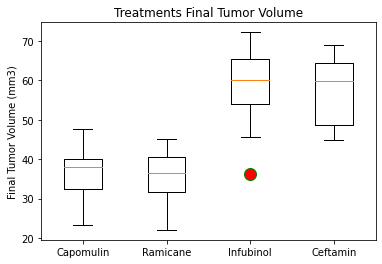

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volumns_dict = {}
for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    tumor_volumns_dict[treatment] = mouse_max_timepoint_df.loc[mouse_max_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
tumor_volumns_dict
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')
# fig, ax = plt.subplots()
plt.boxplot(tumor_volumns_dict.values(), flierprops = flierprops)
plt.xticks([1, 2, 3, 4], tumor_volumns_dict.keys())
plt.title('Treatments Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')

Text(0, 0.5, 'Final Tumor Volume (mm3)')

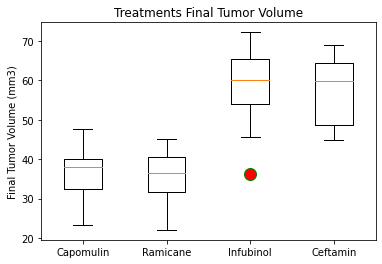

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volumns_dict = {}
for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    tumor_volumns_dict[treatment] = mouse_max_timepoint_df.loc[mouse_max_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
tumor_volumns_dict
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')
fig, ax = plt.subplots()
ax.boxplot(tumor_volumns_dict.values(), flierprops = flierprops)
ax.set_xticklabels(tumor_volumns_dict.keys())
plt.title('Treatments Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

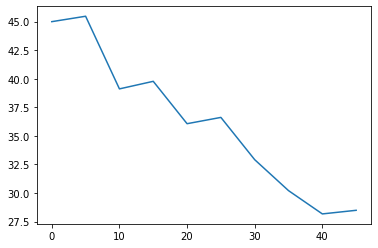

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401 = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'x401', :]
plt.plot(x401['Timepoint'], x401['Tumor Volume (mm3)'])

In [23]:
mouse_max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,IQR,upper,lower,is_outlier
0,k403,Ramicane,Male,21,16,45,22.050126,1,9.098537,54.306811,17.912664,False
1,s185,Capomulin,Female,3,17,45,23.343598,1,7.781863,51.832015,20.704562,False
2,x401,Capomulin,Female,16,15,45,28.484033,0,7.781863,51.832015,20.704562,False
3,m601,Capomulin,Male,22,17,45,28.430964,1,7.781863,51.832015,20.704562,False
4,g791,Ramicane,Male,11,16,45,29.128472,1,9.098537,54.306811,17.912664,False
...,...,...,...,...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0,16.627349,94.044968,27.535572,False
244,z435,Propriva,Female,12,26,10,48.710661,0,13.569629,83.043811,28.765296,False
245,z581,Infubinol,Female,24,25,45,62.754451,3,11.477135,82.741446,36.832905,False
246,z795,Naftisol,Female,13,29,45,65.741070,3,17.484111,95.789787,25.853344,False


Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

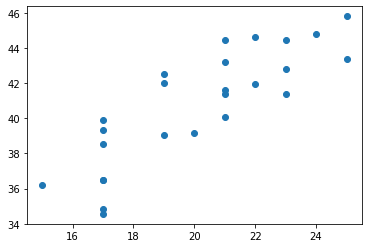

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin', :]
Capomulin_by_mouse_id = Capomulin.groupby('Mouse ID')
Capomulin_by_mouse_id.mean()
x = Capomulin_by_mouse_id.mean()['Weight (g)']
y = Capomulin_by_mouse_id.mean()['Tumor Volume (mm3)']
plt.scatter(x, y)
x

## Correlation and Regression

correlation coefficient:  0.8419363424694718
slope:  0.9544396890241045
intercept:  21.552160532685015


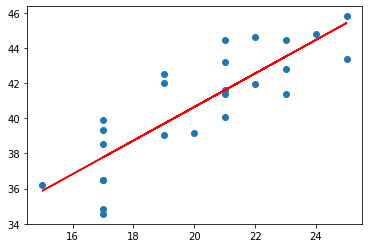

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(Capomulin_by_mouse_id.mean()['Weight (g)'], Capomulin_by_mouse_id.mean()['Tumor Volume (mm3)'])
print('correlation coefficient: ', rvalue)
print('slope: ', slope)
print('intercept: ', intercept)

y_pred = x.astype(float) * slope + intercept
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
